Imports & Setup

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:00


In [ ]:
%cd /content

# Clone the source code from GitHub
!git clone https://github.com/ultralytics/ultralytics.git

/content
Cloning into 'ultralytics'...
remote: Enumerating objects: 61762, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 61762 (delta 114), reused 60 (delta 56), pack-reused 61588 (from 3)
Receiving objects: 100% (61762/61762), 33.46 MiB | 24.74 MiB/s, done.
Resolving deltas: 100% (45990/45990), done.


In [ ]:
%cd /content/ultralytics/

[Errno 2] No such file or directory: '/content/ultralytics/'
/content


In [ ]:
# Create a new cell and run this code.
# It defines the CBAM module and writes it to ultralytics/nn/custom_modules.py


custom_module_code = """
import torch
import torch.nn as nn
from ultralytics.nn.modules import Conv

# This file is automatically discovered by the YOLOv8 parser.
# Any module defined here can be used in a .yaml architecture file.

class ChannelAttention(nn.Module):
    \"\"\"Channel Attention (CA) layer for CBAM.\"\"\"
    def __init__(self, c1, r=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(c1, c1 // r, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(c1 // r, c1, 1, bias=False))
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        out = self.sigmoid(avg_out + max_out)
        return x * out

class SpatialAttention(nn.Module):
    \"\"\"Spatial Attention (SA) layer for CBAM.\"\"\"
    def __init__(self, kernel_size=7):
        super().__init__()
        assert kernel_size in (3, 7), 'kernel size must be 3 or 7'
        padding = 3 if kernel_size == 7 else 1
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg_out, max_out], dim=1)
        out = self.sigmoid(self.conv(x_cat))
        return x * out

class CBAM(nn.Module):
    \"\"\"Convolutional Block Attention Module (CBAM) layer.\"\"\"
    def __init__(self, c1, c2=None, r=16, kernel_size=7):
        super().__init__()
        self.channel_attention = ChannelAttention(c1, r)
        self.spatial_attention = SpatialAttention(kernel_size)
        # The YOLO parser needs to know the output channels. CBAM doesn't change them.
        self.c2 = c1

    def forward(self, x):
        x = self.channel_attention(x)
        x = self.spatial_attention(x)
        return x
"""

# This command ensures the file exists in the correct directory.
# This assumes you have already cloned the ultralytics repo into /content/
# and your current directory is /content/ultralytics
with open("ultralytics/nn/custom_modules.py", "w") as f:
    f.write(custom_module_code)

print("✅ custom_modules.py created successfully with CBAM definition.")

FileNotFoundError: [Errno 2] No such file or directory: 'ultralytics/nn/custom_modules.py'

In [ ]:
import os

# Define the paths to your folders
train_a_path = '/content/underwater_scenes/trainA'
train_b_path = '/content/underwater_scenes/trainB'
validation_path = '/content/underwater_scenes/validation'

# Count the number of files in each folder
num_files_train_a = len(os.listdir(train_a_path))
num_files_train_b = len(os.listdir(train_b_path))
num_files_validation = len(os.listdir(validation_path))

# Print the results
print(f"Number of files in trainA: {num_files_train_a} 📁")
print(f"Number of files in trainB: {num_files_train_b} 📁")
print(f"Number of files in validation: {num_files_validation} 📁")

Number of files in trainA: 2185 📁
Number of files in trainB: 2185 📁
Number of files in validation: 130 📁


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.transforms import functional as F
from PIL import Image
from tqdm import tqdm
import os
import numpy as np

# We need torchmetrics for the SSIM loss, which is crucial for quality.
try:
    from torchmetrics.image import StructuralSimilarityIndexMeasure
    print("✅ torchmetrics and SSIM loaded successfully.")
except ImportError:
    print("❌ CRITICAL: torchmetrics not found. Please run 'pip install torchmetrics'.")
    print("   The script will fallback to L1 loss only, which may produce lower quality results.")
    SSIM = None

# We need the CBAM module from ultralytics.
try:
    from ultralytics.nn.custom_modules import CBAM
    print("✅ CBAM module loaded successfully.")
except (FileNotFoundError, ModuleNotFoundError, ImportError):
    print("⚠️ CBAM module not found, using a placeholder. For best results, ensure ultralytics is set up.")
    class CBAM(nn.Module): # Placeholder
        def __init__(self, c1, *args, **kwargs):
            super().__init__()
            self.c = nn.Sequential(nn.Conv2d(c1, c1, 1), nn.ReLU(), nn.Conv2d(c1, c1, 1), nn.Sigmoid())
        def forward(self, x):
            return x * self.c(x)

✅ torchmetrics and SSIM loaded successfully.
✅ CBAM module loaded successfully.


Step 2 Model Architecture

In [ ]:
# --- Module 2: The Model Architecture ---

class EnhancementBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), nn.BatchNorm2d(out_channels), nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1), nn.BatchNorm2d(out_channels), nn.ReLU(inplace=True)
        )
        self.cbam = CBAM(out_channels)
    def forward(self, x):
        return self.cbam(self.conv_block(x))

class EnhancementUNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super().__init__()
        self.enc1 = EnhancementBlock(in_channels, 64)
        self.enc2 = EnhancementBlock(64, 128)
        self.enc3 = EnhancementBlock(128, 256)
        self.pool = nn.MaxPool2d(2)
        self.bottleneck = EnhancementBlock(256, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = EnhancementBlock(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = EnhancementBlock(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = EnhancementBlock(128, 64)
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        e1 = self.enc1(x)
        p1 = self.pool(e1)
        e2 = self.enc2(p1)
        p2 = self.pool(e2)
        e3 = self.enc3(p2)
        p3 = self.pool(e3)
        b = self.bottleneck(p3)
        d3 = self.upconv3(b)
        d3 = torch.cat((d3, e3), dim=1)
        d3 = self.dec3(d3)
        d2 = self.upconv2(d3)
        d2 = torch.cat((d2, e2), dim=1)
        d2 = self.dec2(d2)
        d1 = self.upconv1(d2)
        d1 = torch.cat((d1, e1), dim=1)
        d1 = self.dec1(d1)
        return torch.sigmoid(self.final_conv(d1))

Data Loading & Preprocessing

In [ ]:

class PairedUnderwaterDataset(Dataset):
    """Dataset for paired images: an input folder and a target folder."""
    def __init__(self, input_dir, target_dir, transform=None):
        self.input_dir = input_dir
        self.target_dir = target_dir
        self.transform = transform
        self.image_files = sorted(os.listdir(input_dir))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        filename = self.image_files[idx]
        input_img_path = os.path.join(self.input_dir, filename)
        target_img_path = os.path.join(self.target_dir, filename)

        input_image = Image.open(input_img_path).convert("RGB")
        target_image = Image.open(target_img_path).convert("RGB")

        # Apply the same set of transforms to both images
        if self.transform:
            input_image, target_image = self.transform(input_image, target_image)

        return input_image, target_image

class PairedTransform:
    """A transform class that applies augmentations to both images in a pair."""
    def __init__(self, target_size=(288, 512)):
        self.target_size = target_size

    def __call__(self, input_image, target_image):
        # Resize both images to the target resolution for high-quality training
        input_image = F.resize(input_image, self.target_size, antialias=True)
        target_image = F.resize(target_image, self.target_size, antialias=True)

        # Random Horizontal Flip (applied to both)
        if torch.rand(1) > 0.5:
            input_image = F.hflip(input_image)
            target_image = F.hflip(target_image)

        # NOTE on Color Jitter: Applying it only to the input is complex with paired
        # datasets. We will rely on our loss function to manage color instead.

        # Convert to Tensor
        input_image = F.to_tensor(input_image)
        target_image = F.to_tensor(target_image)

        return input_image, target_image

In [ ]:
# --- Module 4: Hyperparameters and Configuration (Corrected for Visual Validation) ---

# -- Training Settings --
LEARNING_RATE = 1e-4
BATCH_SIZE = 4
NUM_EPOCHS = 100
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# -- Loss Function Control --
# A higher alpha (e.g., 0.85) prioritizes haze removal and structure.
ALPHA = 0.85

# -- Paths and Resolution --
TRAIN_A_PATH = '/content/underwater_scenes/trainA'
TRAIN_B_PATH = '/content/underwater_scenes/trainB'
# Path to your single validation folder with unpaired images
VAL_PATH = '/content/underwater_scenes/validation'
# Directory where visual validation outputs will be saved
VISUAL_VAL_DIR = '/content/validation_outputs'

MODEL_SAVE_PATH = "/content/enhancement_model_hq_natural.pth"

# Target resolution for training. This will be the output size of the model.
TARGET_RESOLUTION = (288, 512) # (Height, Width)

In [ ]:
# --- Module 5: The Main Training Logic (Corrected for Visual Validation) ---

def main():
    # 1. Setup Training Dataloader (No validation loader needed)
    train_transform = PairedTransform(target_size=TARGET_RESOLUTION)

    train_dataset = PairedUnderwaterDataset(
        input_dir=TRAIN_A_PATH,
        target_dir=TRAIN_B_PATH,
        transform=train_transform
    )
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)

    # A simple transform for the single validation image
    val_image_transform = transforms.Compose([
        transforms.Resize(TARGET_RESOLUTION),
        transforms.ToTensor()
    ])

    # 2. Setup Model, Optimizer, and Loss
    model = EnhancementUNet().to(DEVICE)
    optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)
    l1_loss_fn = nn.L1Loss()
    if SSIM is not None:
        ssim_loss_fn = StructuralSimilarityIndexMeasure(data_range=1.0).to(DEVICE)
    else:
        ssim_loss_fn = None

    print(f"🚀 Starting training on {DEVICE} for {NUM_EPOCHS} epochs!")
    print(f"   Training with {len(train_dataset)} image pairs.")
    print(f"   Performing visual validation using images from: {VAL_PATH}")
    print(f"   Loss function: {ALPHA*100}% SSIM + {(1-ALPHA)*100:.0f}% L1")

    # Create the directory for validation outputs
    os.makedirs(VISUAL_VAL_DIR, exist_ok=True)

    # 3. The Training and Visual Validation Loop
    for epoch in range(NUM_EPOCHS):
        # --- Training Step ---
        model.train()
        train_loss = 0.0
        for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Train]"):
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
            outputs = model(inputs)
            l1_loss = l1_loss_fn(outputs, targets)
            loss = l1_loss
            if ssim_loss_fn:
                ssim_loss = 1 - ssim_loss_fn(outputs, targets)
                loss = (ALPHA * ssim_loss) + ((1 - ALPHA) * l1_loss)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{NUM_EPOCHS} -> Train Loss: {avg_train_loss:.4f}")

        # --- Visual Validation Step ---
        model.eval()
        with torch.no_grad():
            # Get a list of validation images
            val_files = sorted(os.listdir(VAL_PATH))
            if val_files:
                # Pick the first image every time for a consistent comparison
                sample_image_name = val_files[0]
                sample_image_path = os.path.join(VAL_PATH, sample_image_name)

                # Load, transform, and enhance the sample image
                val_image = Image.open(sample_image_path).convert("RGB")
                input_tensor = val_image_transform(val_image).unsqueeze(0).to(DEVICE)
                output_tensor = model(input_tensor)

                # Convert output back to a PIL Image
                output_image = F.to_pil_image(output_tensor.squeeze(0).cpu())

                # Save the enhanced image
                save_path = os.path.join(VISUAL_VAL_DIR, f"epoch_{epoch+1:03d}_{sample_image_name}")
                output_image.save(save_path)
                print(f"   📸 Saved visual validation sample to {save_path}")
            else:
                print("   ⚠️ No images found in validation directory, skipping visual validation.")

    # Save the final model at the end of training
    torch.save(model.state_dict(), MODEL_SAVE_PATH)
    print(f"✅ Training complete. Final model saved to {MODEL_SAVE_PATH}")


if __name__ == '__main__':
    main()

🚀 Starting training on cuda for 100 epochs!
   Training with 2185 image pairs.
   Performing visual validation using images from: /content/underwater_scenes/validation
   Loss function: 85.0% SSIM + 15% L1


Epoch 1/100 [Train]: 100%|██████████| 547/547 [05:03<00:00,  1.80it/s]


Epoch 1/100 -> Train Loss: 0.0931
   📸 Saved visual validation sample to /content/validation_outputs/epoch_001_im_f1010_.jpg


Epoch 2/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 2/100 -> Train Loss: 0.0658
   📸 Saved visual validation sample to /content/validation_outputs/epoch_002_im_f1010_.jpg


Epoch 3/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 3/100 -> Train Loss: 0.0594
   📸 Saved visual validation sample to /content/validation_outputs/epoch_003_im_f1010_.jpg


Epoch 4/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 4/100 -> Train Loss: 0.0545
   📸 Saved visual validation sample to /content/validation_outputs/epoch_004_im_f1010_.jpg


Epoch 5/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 5/100 -> Train Loss: 0.0538
   📸 Saved visual validation sample to /content/validation_outputs/epoch_005_im_f1010_.jpg


Epoch 6/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 6/100 -> Train Loss: 0.0505
   📸 Saved visual validation sample to /content/validation_outputs/epoch_006_im_f1010_.jpg


Epoch 7/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 7/100 -> Train Loss: 0.0486
   📸 Saved visual validation sample to /content/validation_outputs/epoch_007_im_f1010_.jpg


Epoch 8/100 [Train]: 100%|██████████| 547/547 [05:05<00:00,  1.79it/s]


Epoch 8/100 -> Train Loss: 0.0473
   📸 Saved visual validation sample to /content/validation_outputs/epoch_008_im_f1010_.jpg


Epoch 9/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 9/100 -> Train Loss: 0.0461
   📸 Saved visual validation sample to /content/validation_outputs/epoch_009_im_f1010_.jpg


Epoch 10/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 10/100 -> Train Loss: 0.0454
   📸 Saved visual validation sample to /content/validation_outputs/epoch_010_im_f1010_.jpg


Epoch 11/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 11/100 -> Train Loss: 0.0449
   📸 Saved visual validation sample to /content/validation_outputs/epoch_011_im_f1010_.jpg


Epoch 12/100 [Train]: 100%|██████████| 547/547 [05:05<00:00,  1.79it/s]


Epoch 12/100 -> Train Loss: 0.0442
   📸 Saved visual validation sample to /content/validation_outputs/epoch_012_im_f1010_.jpg


Epoch 13/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 13/100 -> Train Loss: 0.0440
   📸 Saved visual validation sample to /content/validation_outputs/epoch_013_im_f1010_.jpg


Epoch 14/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 14/100 -> Train Loss: 0.0436
   📸 Saved visual validation sample to /content/validation_outputs/epoch_014_im_f1010_.jpg


Epoch 15/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 15/100 -> Train Loss: 0.0424
   📸 Saved visual validation sample to /content/validation_outputs/epoch_015_im_f1010_.jpg


Epoch 16/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 16/100 -> Train Loss: 0.0419
   📸 Saved visual validation sample to /content/validation_outputs/epoch_016_im_f1010_.jpg


Epoch 17/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 17/100 -> Train Loss: 0.0416
   📸 Saved visual validation sample to /content/validation_outputs/epoch_017_im_f1010_.jpg


Epoch 18/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 18/100 -> Train Loss: 0.0409
   📸 Saved visual validation sample to /content/validation_outputs/epoch_018_im_f1010_.jpg


Epoch 19/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 19/100 -> Train Loss: 0.0414
   📸 Saved visual validation sample to /content/validation_outputs/epoch_019_im_f1010_.jpg


Epoch 20/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 20/100 -> Train Loss: 0.0408
   📸 Saved visual validation sample to /content/validation_outputs/epoch_020_im_f1010_.jpg


Epoch 21/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 21/100 -> Train Loss: 0.0403
   📸 Saved visual validation sample to /content/validation_outputs/epoch_021_im_f1010_.jpg


Epoch 22/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 22/100 -> Train Loss: 0.0398
   📸 Saved visual validation sample to /content/validation_outputs/epoch_022_im_f1010_.jpg


Epoch 23/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 23/100 -> Train Loss: 0.0397
   📸 Saved visual validation sample to /content/validation_outputs/epoch_023_im_f1010_.jpg


Epoch 24/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 24/100 -> Train Loss: 0.0393
   📸 Saved visual validation sample to /content/validation_outputs/epoch_024_im_f1010_.jpg


Epoch 25/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 25/100 -> Train Loss: 0.0395
   📸 Saved visual validation sample to /content/validation_outputs/epoch_025_im_f1010_.jpg


Epoch 26/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 26/100 -> Train Loss: 0.0389
   📸 Saved visual validation sample to /content/validation_outputs/epoch_026_im_f1010_.jpg


Epoch 27/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 27/100 -> Train Loss: 0.0386
   📸 Saved visual validation sample to /content/validation_outputs/epoch_027_im_f1010_.jpg


Epoch 28/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 28/100 -> Train Loss: 0.0382
   📸 Saved visual validation sample to /content/validation_outputs/epoch_028_im_f1010_.jpg


Epoch 29/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 29/100 -> Train Loss: 0.0377
   📸 Saved visual validation sample to /content/validation_outputs/epoch_029_im_f1010_.jpg


Epoch 30/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 30/100 -> Train Loss: 0.0372
   📸 Saved visual validation sample to /content/validation_outputs/epoch_030_im_f1010_.jpg


Epoch 31/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 31/100 -> Train Loss: 0.0372
   📸 Saved visual validation sample to /content/validation_outputs/epoch_031_im_f1010_.jpg


Epoch 32/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 32/100 -> Train Loss: 0.0373
   📸 Saved visual validation sample to /content/validation_outputs/epoch_032_im_f1010_.jpg


Epoch 33/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 33/100 -> Train Loss: 0.0368
   📸 Saved visual validation sample to /content/validation_outputs/epoch_033_im_f1010_.jpg


Epoch 34/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 34/100 -> Train Loss: 0.0368
   📸 Saved visual validation sample to /content/validation_outputs/epoch_034_im_f1010_.jpg


Epoch 35/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 35/100 -> Train Loss: 0.0367
   📸 Saved visual validation sample to /content/validation_outputs/epoch_035_im_f1010_.jpg


Epoch 36/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 36/100 -> Train Loss: 0.0363
   📸 Saved visual validation sample to /content/validation_outputs/epoch_036_im_f1010_.jpg


Epoch 37/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 37/100 -> Train Loss: 0.0362
   📸 Saved visual validation sample to /content/validation_outputs/epoch_037_im_f1010_.jpg


Epoch 38/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 38/100 -> Train Loss: 0.0361
   📸 Saved visual validation sample to /content/validation_outputs/epoch_038_im_f1010_.jpg


Epoch 39/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 39/100 -> Train Loss: 0.0358
   📸 Saved visual validation sample to /content/validation_outputs/epoch_039_im_f1010_.jpg


Epoch 40/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 40/100 -> Train Loss: 0.0355
   📸 Saved visual validation sample to /content/validation_outputs/epoch_040_im_f1010_.jpg


Epoch 41/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 41/100 -> Train Loss: 0.0353
   📸 Saved visual validation sample to /content/validation_outputs/epoch_041_im_f1010_.jpg


Epoch 42/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 42/100 -> Train Loss: 0.0355
   📸 Saved visual validation sample to /content/validation_outputs/epoch_042_im_f1010_.jpg


Epoch 43/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 43/100 -> Train Loss: 0.0347
   📸 Saved visual validation sample to /content/validation_outputs/epoch_043_im_f1010_.jpg


Epoch 44/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 44/100 -> Train Loss: 0.0346
   📸 Saved visual validation sample to /content/validation_outputs/epoch_044_im_f1010_.jpg


Epoch 45/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 45/100 -> Train Loss: 0.0343
   📸 Saved visual validation sample to /content/validation_outputs/epoch_045_im_f1010_.jpg


Epoch 46/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 46/100 -> Train Loss: 0.0344
   📸 Saved visual validation sample to /content/validation_outputs/epoch_046_im_f1010_.jpg


Epoch 47/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 47/100 -> Train Loss: 0.0342
   📸 Saved visual validation sample to /content/validation_outputs/epoch_047_im_f1010_.jpg


Epoch 48/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 48/100 -> Train Loss: 0.0336
   📸 Saved visual validation sample to /content/validation_outputs/epoch_048_im_f1010_.jpg


Epoch 49/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 49/100 -> Train Loss: 0.0337
   📸 Saved visual validation sample to /content/validation_outputs/epoch_049_im_f1010_.jpg


Epoch 50/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 50/100 -> Train Loss: 0.0336
   📸 Saved visual validation sample to /content/validation_outputs/epoch_050_im_f1010_.jpg


Epoch 51/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 51/100 -> Train Loss: 0.0336
   📸 Saved visual validation sample to /content/validation_outputs/epoch_051_im_f1010_.jpg


Epoch 52/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 52/100 -> Train Loss: 0.0335
   📸 Saved visual validation sample to /content/validation_outputs/epoch_052_im_f1010_.jpg


Epoch 53/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 53/100 -> Train Loss: 0.0328
   📸 Saved visual validation sample to /content/validation_outputs/epoch_053_im_f1010_.jpg


Epoch 54/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 54/100 -> Train Loss: 0.0331
   📸 Saved visual validation sample to /content/validation_outputs/epoch_054_im_f1010_.jpg


Epoch 55/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 55/100 -> Train Loss: 0.0327
   📸 Saved visual validation sample to /content/validation_outputs/epoch_055_im_f1010_.jpg


Epoch 56/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 56/100 -> Train Loss: 0.0327
   📸 Saved visual validation sample to /content/validation_outputs/epoch_056_im_f1010_.jpg


Epoch 57/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 57/100 -> Train Loss: 0.0323
   📸 Saved visual validation sample to /content/validation_outputs/epoch_057_im_f1010_.jpg


Epoch 58/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 58/100 -> Train Loss: 0.0320
   📸 Saved visual validation sample to /content/validation_outputs/epoch_058_im_f1010_.jpg


Epoch 59/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 59/100 -> Train Loss: 0.0324
   📸 Saved visual validation sample to /content/validation_outputs/epoch_059_im_f1010_.jpg


Epoch 60/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 60/100 -> Train Loss: 0.0319
   📸 Saved visual validation sample to /content/validation_outputs/epoch_060_im_f1010_.jpg


Epoch 61/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 61/100 -> Train Loss: 0.0319
   📸 Saved visual validation sample to /content/validation_outputs/epoch_061_im_f1010_.jpg


Epoch 62/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 62/100 -> Train Loss: 0.0316
   📸 Saved visual validation sample to /content/validation_outputs/epoch_062_im_f1010_.jpg


Epoch 63/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 63/100 -> Train Loss: 0.0318
   📸 Saved visual validation sample to /content/validation_outputs/epoch_063_im_f1010_.jpg


Epoch 64/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 64/100 -> Train Loss: 0.0317
   📸 Saved visual validation sample to /content/validation_outputs/epoch_064_im_f1010_.jpg


Epoch 65/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 65/100 -> Train Loss: 0.0313
   📸 Saved visual validation sample to /content/validation_outputs/epoch_065_im_f1010_.jpg


Epoch 66/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 66/100 -> Train Loss: 0.0311
   📸 Saved visual validation sample to /content/validation_outputs/epoch_066_im_f1010_.jpg


Epoch 67/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 67/100 -> Train Loss: 0.0315
   📸 Saved visual validation sample to /content/validation_outputs/epoch_067_im_f1010_.jpg


Epoch 68/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 68/100 -> Train Loss: 0.0315
   📸 Saved visual validation sample to /content/validation_outputs/epoch_068_im_f1010_.jpg


Epoch 69/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 69/100 -> Train Loss: 0.0310
   📸 Saved visual validation sample to /content/validation_outputs/epoch_069_im_f1010_.jpg


Epoch 70/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 70/100 -> Train Loss: 0.0312
   📸 Saved visual validation sample to /content/validation_outputs/epoch_070_im_f1010_.jpg


Epoch 71/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 71/100 -> Train Loss: 0.0306
   📸 Saved visual validation sample to /content/validation_outputs/epoch_071_im_f1010_.jpg


Epoch 72/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 72/100 -> Train Loss: 0.0307
   📸 Saved visual validation sample to /content/validation_outputs/epoch_072_im_f1010_.jpg


Epoch 73/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 73/100 -> Train Loss: 0.0309
   📸 Saved visual validation sample to /content/validation_outputs/epoch_073_im_f1010_.jpg


Epoch 74/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 74/100 -> Train Loss: 0.0305
   📸 Saved visual validation sample to /content/validation_outputs/epoch_074_im_f1010_.jpg


Epoch 75/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 75/100 -> Train Loss: 0.0306
   📸 Saved visual validation sample to /content/validation_outputs/epoch_075_im_f1010_.jpg


Epoch 76/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 76/100 -> Train Loss: 0.0299
   📸 Saved visual validation sample to /content/validation_outputs/epoch_076_im_f1010_.jpg


Epoch 77/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 77/100 -> Train Loss: 0.0302
   📸 Saved visual validation sample to /content/validation_outputs/epoch_077_im_f1010_.jpg


Epoch 78/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 78/100 -> Train Loss: 0.0302
   📸 Saved visual validation sample to /content/validation_outputs/epoch_078_im_f1010_.jpg


Epoch 79/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 79/100 -> Train Loss: 0.0300
   📸 Saved visual validation sample to /content/validation_outputs/epoch_079_im_f1010_.jpg


Epoch 80/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 80/100 -> Train Loss: 0.0297
   📸 Saved visual validation sample to /content/validation_outputs/epoch_080_im_f1010_.jpg


Epoch 81/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 81/100 -> Train Loss: 0.0299
   📸 Saved visual validation sample to /content/validation_outputs/epoch_081_im_f1010_.jpg


Epoch 82/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 82/100 -> Train Loss: 0.0298
   📸 Saved visual validation sample to /content/validation_outputs/epoch_082_im_f1010_.jpg


Epoch 83/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 83/100 -> Train Loss: 0.0298
   📸 Saved visual validation sample to /content/validation_outputs/epoch_083_im_f1010_.jpg


Epoch 84/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 84/100 -> Train Loss: 0.0300
   📸 Saved visual validation sample to /content/validation_outputs/epoch_084_im_f1010_.jpg


Epoch 85/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 85/100 -> Train Loss: 0.0299
   📸 Saved visual validation sample to /content/validation_outputs/epoch_085_im_f1010_.jpg


Epoch 86/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 86/100 -> Train Loss: 0.0297
   📸 Saved visual validation sample to /content/validation_outputs/epoch_086_im_f1010_.jpg


Epoch 87/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 87/100 -> Train Loss: 0.0296
   📸 Saved visual validation sample to /content/validation_outputs/epoch_087_im_f1010_.jpg


Epoch 88/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 88/100 -> Train Loss: 0.0290
   📸 Saved visual validation sample to /content/validation_outputs/epoch_088_im_f1010_.jpg


Epoch 89/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 89/100 -> Train Loss: 0.0290
   📸 Saved visual validation sample to /content/validation_outputs/epoch_089_im_f1010_.jpg


Epoch 90/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 90/100 -> Train Loss: 0.0291
   📸 Saved visual validation sample to /content/validation_outputs/epoch_090_im_f1010_.jpg


Epoch 91/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 91/100 -> Train Loss: 0.0291
   📸 Saved visual validation sample to /content/validation_outputs/epoch_091_im_f1010_.jpg


Epoch 92/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 92/100 -> Train Loss: 0.0293
   📸 Saved visual validation sample to /content/validation_outputs/epoch_092_im_f1010_.jpg


Epoch 93/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 93/100 -> Train Loss: 0.0292
   📸 Saved visual validation sample to /content/validation_outputs/epoch_093_im_f1010_.jpg


Epoch 94/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 94/100 -> Train Loss: 0.0294
   📸 Saved visual validation sample to /content/validation_outputs/epoch_094_im_f1010_.jpg


Epoch 95/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 95/100 -> Train Loss: 0.0287
   📸 Saved visual validation sample to /content/validation_outputs/epoch_095_im_f1010_.jpg


Epoch 96/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 96/100 -> Train Loss: 0.0286
   📸 Saved visual validation sample to /content/validation_outputs/epoch_096_im_f1010_.jpg


Epoch 97/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 97/100 -> Train Loss: 0.0292
   📸 Saved visual validation sample to /content/validation_outputs/epoch_097_im_f1010_.jpg


Epoch 98/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.79it/s]


Epoch 98/100 -> Train Loss: 0.0286
   📸 Saved visual validation sample to /content/validation_outputs/epoch_098_im_f1010_.jpg


Epoch 99/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 99/100 -> Train Loss: 0.0288
   📸 Saved visual validation sample to /content/validation_outputs/epoch_099_im_f1010_.jpg


Epoch 100/100 [Train]: 100%|██████████| 547/547 [05:06<00:00,  1.78it/s]


Epoch 100/100 -> Train Loss: 0.0286
   📸 Saved visual validation sample to /content/validation_outputs/epoch_100_im_f1010_.jpg
✅ Training complete. Final model saved to /content/enhancement_model_hq_natural.pth


In [ ]:
%cd /content/ultralytics/

/content/ultralytics


✅ CBAM module loaded successfully from ultralytics.
✅ Model loaded successfully from /content/enhancement_model_hq_natural.pth
   Model set to evaluation mode.
   Using inference resolution: 512x288


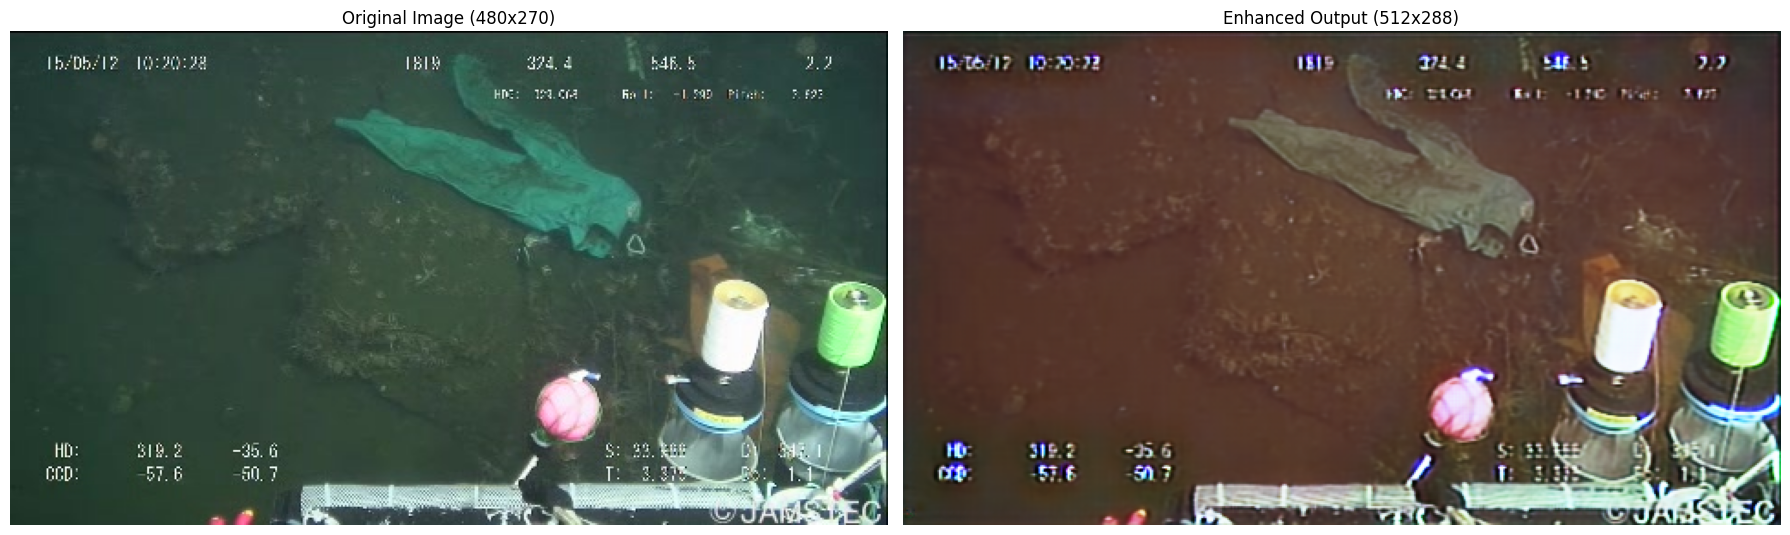

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# --- Step 1: Re-define the Model Architecture ---
# This MUST be the EXACT same architecture as used in your training script.
try:
    # Assuming you are in the /content/ directory
    from ultralytics.nn.custom_modules import CBAM
    print("✅ CBAM module loaded successfully from ultralytics.")
except (FileNotFoundError, ModuleNotFoundError):
    print("❌ ERROR: Could not find the CBAM module in '/content/ultralytics'.")
    print("Please make sure the ultralytics repository is available.")
    # As a fallback, define a dummy CBAM if needed for the script to run without it
    class CBAM(nn.Module):
        def __init__(self, c1, ratio=16, kernel_size=7):
            super().__init__()
            self.channel_attention = nn.Sequential(nn.AdaptiveAvgPool2d(1), nn.Conv2d(c1, c1 // ratio, 1, bias=False), nn.ReLU(), nn.Conv2d(c1 // ratio, c1, 1, bias=False))
            self.spatial_attention = nn.Conv2d(2, 1, kernel_size, padding=kernel_size // 2, bias=False)
        def forward(self, x):
            return x * torch.sigmoid(self.channel_attention(x)) + x * torch.sigmoid(self.spatial_attention(torch.cat([torch.mean(x, 1, keepdim=True), torch.max(x, 1, keepdim=True)[0]], 1)))


class EnhancementBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), nn.BatchNorm2d(out_channels), nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1), nn.BatchNorm2d(out_channels), nn.ReLU(inplace=True)
        )
        self.cbam = CBAM(out_channels)
    def forward(self, x):
        return self.cbam(self.conv_block(x))

class EnhancementUNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super().__init__()
        self.enc1 = EnhancementBlock(in_channels, 64)
        self.enc2 = EnhancementBlock(64, 128)
        self.enc3 = EnhancementBlock(128, 256)
        self.pool = nn.MaxPool2d(2)
        self.bottleneck = EnhancementBlock(256, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = EnhancementBlock(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = EnhancementBlock(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = EnhancementBlock(128, 64)
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        e1 = self.enc1(x)
        p1 = self.pool(e1)
        e2 = self.enc2(p1)
        p2 = self.pool(e2)
        e3 = self.enc3(p2)
        p3 = self.pool(e3)
        b = self.bottleneck(p3)
        d3 = self.upconv3(b)
        d3 = torch.cat((d3, e3), dim=1)
        d3 = self.dec3(d3)
        d2 = self.upconv2(d3)
        d2 = torch.cat((d2, e2), dim=1)
        d2 = self.dec2(d2)
        d1 = self.upconv1(d2)
        d1 = torch.cat((d1, e1), dim=1)
        d1 = self.dec1(d1)
        return torch.sigmoid(self.final_conv(d1))

# --- Step 2: Load the NEW High-Quality Trained Model ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = '/content/enhancement_model_hq_natural.pth' # The path from your training script

# Instantiate the model
inference_model = EnhancementUNet().to(device)

# Load the saved weights
try:
    inference_model.load_state_dict(torch.load(model_path, map_location=device))
    print(f"✅ Model loaded successfully from {model_path}")
except FileNotFoundError:
    print(f"❌ ERROR: Model file not found at {model_path}")
    print("Please ensure the model file exists and the path is correct.")
    # Stop execution if model is not found
    assert False, "Model file not found."


# Set the model to evaluation mode (CRUCIAL!)
inference_model.eval()
print("   Model set to evaluation mode.")


# --- Step 3: Define Inference Transformations (Matching Training) ---
# These transforms MUST match the resolution the model was trained on.
TARGET_RESOLUTION = (288, 512) # (Height, Width)
inference_transforms = transforms.Compose([
    transforms.Resize(TARGET_RESOLUTION),
    transforms.ToTensor(),
])
print(f"   Using inference resolution: {TARGET_RESOLUTION[1]}x{TARGET_RESOLUTION[0]}")


# --- Step 4: Function to Enhance a Single Image ---
def enhance_image(image_path, model, device, transform_pipeline):
    """Loads, transforms, enhances, and returns an image."""
    try:
        img = Image.open(image_path).convert('RGB')
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None, None

    # Prepare the image for the model
    input_tensor = transform_pipeline(img).unsqueeze(0).to(device) # Add batch dimension

    # Perform inference
    with torch.no_grad(): # Disables gradient calculation
        output_tensor = model(input_tensor)

    # Convert output tensor back to a PIL Image
    output_tensor = output_tensor.squeeze(0).cpu()
    output_img = transforms.ToPILImage()(output_tensor)

    return img, output_img

# --- Step 5: Process and Visualize One Example Image ---
# !!! UPDATE THIS PATH to an image from your TrashCan dataset !!!
sample_image_path = '/content/drive/MyDrive/instance_version/val/vid_000091_frame0000042.jpg' #<-- CHANGE THIS

# Create a dummy image if the specified path doesn't exist, to make the script runnable for testing
if not os.path.exists(sample_image_path):
    print(f"⚠️ Warning: Test image not found at '{sample_image_path}'.")
    print("   Creating a dummy image for demonstration purposes.")
    os.makedirs(os.path.dirname(sample_image_path), exist_ok=True)
    dummy_img = Image.new('RGB', (640, 480), color = 'darkcyan')
    dummy_img.save(sample_image_path)

# Enhance the chosen image
original_img, enhanced_img = enhance_image(sample_image_path, inference_model, device, inference_transforms)

# Display the results
if original_img and enhanced_img:
    fig, ax = plt.subplots(1, 2, figsize=(18, 9))

    # Display Original Image
    ax[0].imshow(original_img)
    ax[0].set_title(f"Original Image ({original_img.width}x{original_img.height})")
    ax[0].axis('off')

    # Display Enhanced Image
    ax[1].imshow(enhanced_img)
    ax[1].set_title(f"Enhanced Output ({enhanced_img.width}x{enhanced_img.height})")
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

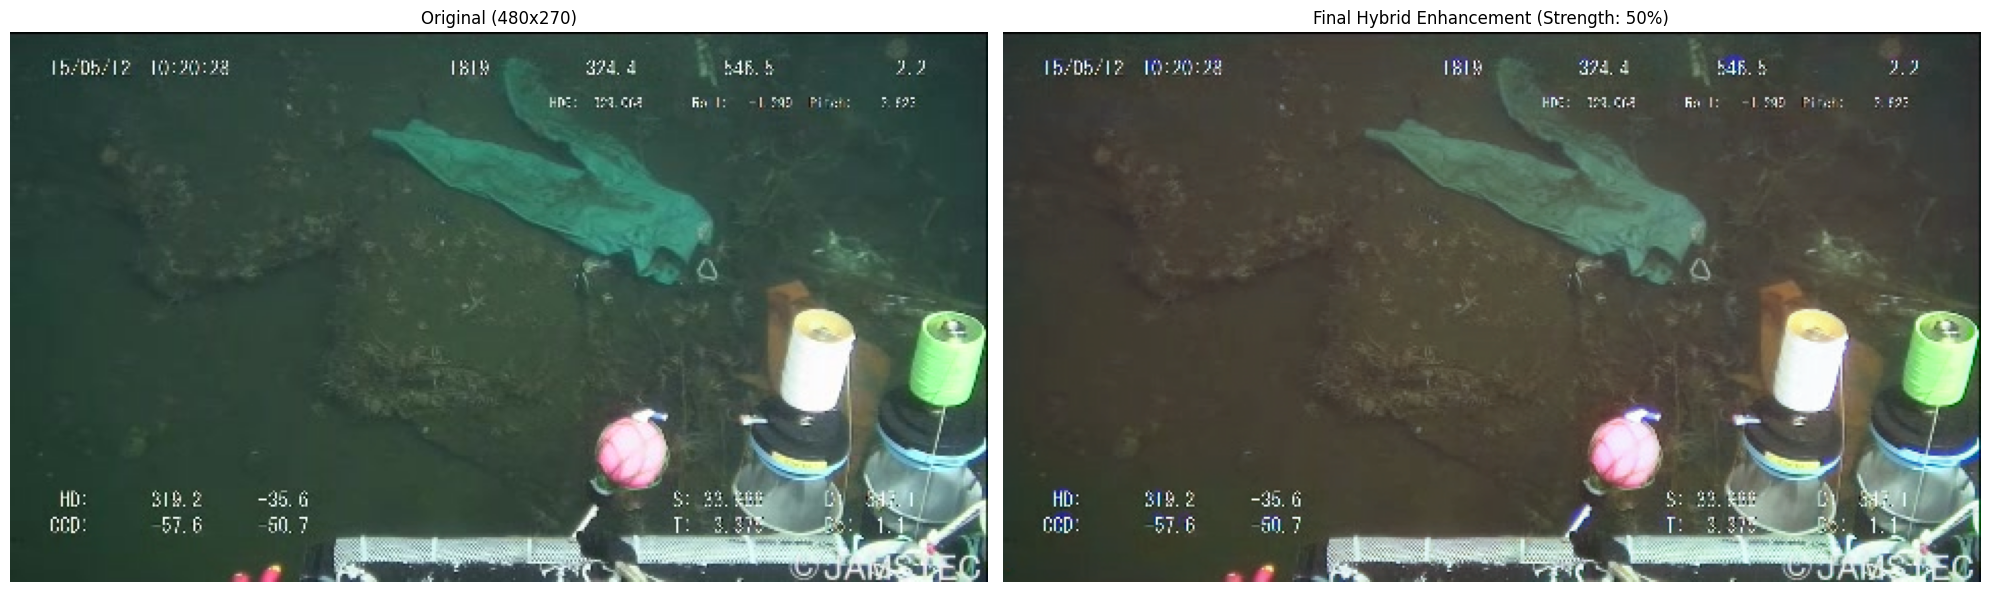

In [ ]:
def hybrid_enhancement(original_img, enhanced_img, blend_factor=0.75):
    """
    Combines Alpha Blending and L*a*b* Color Transfer for a superior result.
    It applies a controlled amount of the learned color correction to the
    perfectly preserved detail of the original image.

    Args:
        original_img (PIL.Image): The original, sharp input image.
        enhanced_img (PIL.Image): The output from the enhancement model.
        blend_factor (float): The strength of the enhancement. 0.0 is the original image,
                              1.0 is the full enhancement color. Defaults to 0.75.
    Returns:
        PIL.Image: The final, hybrid-enhanced image.
    """
    # Resize the enhanced image to match the original's dimensions
    enhanced_resized = enhanced_img.resize(original_img.size, Image.LANCZOS)

    # Create the target color palette by blending
    blended_colors_img = Image.blend(original_img, enhanced_resized, alpha=blend_factor)

    # Convert to LAB space to separate detail from color
    source_lab = original_img.convert("LAB")
    target_lab = blended_colors_img.convert("LAB")

    # Split channels
    L_source, _, _ = source_lab.split()
    _, A_target, B_target = target_lab.split()

    # Merge the Luminance (detail) from the original with the color from the blended target
    hybrid_lab = Image.merge("LAB", (L_source, A_target, B_target))

    # Convert back to RGB
    final_img = hybrid_lab.convert("RGB")
    return final_img

# --- Step 5: Process and Visualize ---
# !!! UPDATE THIS PATH to an image from your TrashCan dataset !!!
sample_image_path = '/content/drive/MyDrive/instance_version/val/vid_000091_frame0000042.jpg' #<-- CHANGE THIS

# Ensure the sample image exists
if not os.path.exists(sample_image_path):
    print(f"⚠️ Warning: Test image not found at '{sample_image_path}'. Creating dummy.")
    os.makedirs(os.path.dirname(sample_image_path), exist_ok=True)
    Image.new('RGB', (640, 480), color='darkcyan').save(sample_image_path)

# 1. Get the raw model output
original_img, raw_enhanced_img = enhance_image(sample_image_path, inference_model, device, inference_transforms)

# 2. Apply the superior hybrid enhancement
if original_img and raw_enhanced_img:
    # Set the desired strength of the enhancement
    ENHANCEMENT_STRENGTH = 0.5  # <-- TUNE THIS VALUE (0.0 to 1.0)

    final_result_img = hybrid_enhancement(
        original_img,
        raw_enhanced_img,
        blend_factor=ENHANCEMENT_STRENGTH
    )

    # 3. Display the final, clean comparison
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    ax[0].imshow(original_img)
    ax[0].set_title(f"Original ({original_img.width}x{original_img.height})")
    ax[0].axis('off')

    ax[1].imshow(final_result_img)
    ax[1].set_title(f"Final Hybrid Enhancement (Strength: {ENHANCEMENT_STRENGTH*100:.0f}%)")
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import os
import shutil
from tqdm import tqdm

# ==============================================================================
# ⚙️ 1. CONFIGURATION
#    Update these paths to match your project structure.
# ==============================================================================

# --- Input Paths ---
# The root directory of your original dataset
INPUT_DATASET_ROOT = '/content/drive/MyDrive/instance_version'
# Path to the trained model weights
MODEL_PATH = '/content/enhancement_model_hq_natural.pth'

# --- Output Path ---
# A NEW directory where the enhanced dataset will be saved
OUTPUT_DATASET_ROOT = '/content/drive/MyDrive/instance_version_enhanced'

# --- Enhancement Settings ---
# The resolution your model was trained on
TARGET_RESOLUTION = (288, 512)  # (Height, Width)
# The strength of the color enhancement (0.0 = original, 1.0 = full enhancement)
ENHANCEMENT_STRENGTH = 0.5

# --- Control Flag ---
# If True, will re-process and overwrite existing enhanced images.
# If False, will skip any image that has already been processed.
FORCE_OVERWRITE = False

# ==============================================================================
# 🏗️ 2. MODEL DEFINITIONS & HELPER FUNCTIONS (Copied from your script)
#    This section should not be changed.
# ==============================================================================

try:
    from ultralytics.nn.custom_modules import CBAM
except (FileNotFoundError, ModuleNotFoundError):
    print("⚠️ ultralytics CBAM not found. Using a placeholder definition.")
    class CBAM(nn.Module): # Placeholder
        def __init__(self, c1, *args, **kwargs):
            super().__init__()
            self.c = nn.Sequential(nn.Conv2d(c1, c1, 1), nn.ReLU(), nn.Conv2d(c1, c1, 1), nn.Sigmoid())
        def forward(self, x):
            return x * self.c(x)

class EnhancementBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), nn.BatchNorm2d(out_channels), nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1), nn.BatchNorm2d(out_channels), nn.ReLU(inplace=True)
        )
        self.cbam = CBAM(out_channels)
    def forward(self, x):
        return self.cbam(self.conv_block(x))

class EnhancementUNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super().__init__()
        self.enc1 = EnhancementBlock(in_channels, 64)
        self.enc2 = EnhancementBlock(64, 128)
        self.enc3 = EnhancementBlock(128, 256)
        self.pool = nn.MaxPool2d(2)
        self.bottleneck = EnhancementBlock(256, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = EnhancementBlock(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = EnhancementBlock(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = EnhancementBlock(128, 64)
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        e1 = self.enc1(x)
        p1 = self.pool(e1)
        e2 = self.enc2(p1)
        p2 = self.pool(e2)
        e3 = self.enc3(p2)
        p3 = self.pool(e3)
        b = self.bottleneck(p3)
        d3 = self.upconv3(b)
        d3 = torch.cat((d3, e3), dim=1)
        d3 = self.dec3(d3)
        d2 = self.upconv2(d3)
        d2 = torch.cat((d2, e2), dim=1)
        d2 = self.dec2(d2)
        d1 = self.upconv1(d2)
        d1 = torch.cat((d1, e1), dim=1)
        d1 = self.dec1(d1)
        return torch.sigmoid(self.final_conv(d1))

def get_raw_enhancement(original_img, model, device, transform_pipeline):
    """Gets the raw, resized output from the model."""
    input_tensor = transform_pipeline(original_img).unsqueeze(0).to(device)
    with torch.no_grad():
        output_tensor = model(input_tensor)
    output_tensor = output_tensor.squeeze(0).cpu()
    output_img = transforms.ToPILImage()(output_tensor)
    return output_img

def hybrid_enhancement(original_img, enhanced_img, blend_factor):
    """Applies color correction while preserving original detail and dimensions."""
    enhanced_resized = enhanced_img.resize(original_img.size, Image.LANCZOS)
    blended_colors_img = Image.blend(original_img, enhanced_resized, alpha=blend_factor)
    source_lab = original_img.convert("LAB")
    target_lab = blended_colors_img.convert("LAB")
    L_source, _, _ = source_lab.split()
    _, A_target, B_target = target_lab.split()
    hybrid_lab = Image.merge("LAB", (L_source, A_target, B_target))
    final_img = hybrid_lab.convert("RGB")
    return final_img

# ==============================================================================
# 🚀 3. MAIN BATCH PROCESSING SCRIPT
# ==============================================================================

def process_dataset_directory(input_dir, output_dir, model, device, transforms, strength, overwrite):
    """Loops through a directory, enhances images, and saves them."""
    print(f"\nProcessing directory: {input_dir}")
    os.makedirs(output_dir, exist_ok=True)

    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("   No images found in this directory. Skipping.")
        return

    for filename in tqdm(image_files, desc=f"   Enhancing {os.path.basename(input_dir)}"):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        if os.path.exists(output_path) and not overwrite:
            continue  # Skip if already processed

        try:
            original_img = Image.open(input_path).convert('RGB')
            raw_enhanced_img = get_raw_enhancement(original_img, model, device, transforms)
            final_img = hybrid_enhancement(original_img, raw_enhanced_img, blend_factor=strength)
            final_img.save(output_path)
        except Exception as e:
            print(f"   Could not process {filename}. Reason: {e}")

    print(f"✅ Finished processing. Enhanced images saved in: {output_dir}")

if __name__ == '__main__':
    # --- Setup Model and Transforms ---
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inference_model = EnhancementUNet().to(device)
    try:
        inference_model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
        print(f"✅ Model loaded successfully from {MODEL_PATH}")
    except Exception as e:
        print(f"❌ FATAL: Could not load model. Error: {e}")
        exit()
    inference_model.eval()

    inference_transforms = transforms.Compose([
        transforms.Resize(TARGET_RESOLUTION),
        transforms.ToTensor(),
    ])

    # --- Process Train and Val Sets ---
    train_input_dir = os.path.join(INPUT_DATASET_ROOT, 'train')
    train_output_dir = os.path.join(OUTPUT_DATASET_ROOT, 'train')
    process_dataset_directory(train_input_dir, train_output_dir, inference_model, device, inference_transforms, ENHANCEMENT_STRENGTH, FORCE_OVERWRITE)

    val_input_dir = os.path.join(INPUT_DATASET_ROOT, 'val')
    val_output_dir = os.path.join(OUTPUT_DATASET_ROOT, 'val')
    process_dataset_directory(val_input_dir, val_output_dir, inference_model, device, inference_transforms, ENHANCEMENT_STRENGTH, FORCE_OVERWRITE)

    # --- Copy JSON Annotation Files ---
    print("\nCopying JSON annotation files...")
    try:
        shutil.copy(os.path.join(INPUT_DATASET_ROOT, 'instances_train_trashcan.json'), OUTPUT_DATASET_ROOT)
        shutil.copy(os.path.join(INPUT_DATASET_ROOT, 'instances_val_trashcan.json'), OUTPUT_DATASET_ROOT)
        print("✅ JSON files copied successfully.")
    except FileNotFoundError:
        print("⚠️ Warning: Could not find JSON files to copy.")

    print("\n🎉 Dataset enhancement complete!")

✅ Model loaded successfully from /content/enhancement_model_hq_natural.pth

Processing directory: /content/drive/MyDrive/instance_version/train


   Enhancing train: 100%|██████████| 6065/6065 [18:59<00:00,  5.32it/s]


✅ Finished processing. Enhanced images saved in: /content/drive/MyDrive/instance_version_enhanced/train

Processing directory: /content/drive/MyDrive/instance_version/val


   Enhancing val: 100%|██████████| 1147/1147 [03:52<00:00,  4.92it/s]


✅ Finished processing. Enhanced images saved in: /content/drive/MyDrive/instance_version_enhanced/val

Copying JSON annotation files...
✅ JSON files copied successfully.

🎉 Dataset enhancement complete!


In [ ]:
# YOLOv8m-CBAM-Swin Hybrid Configuration
#
# Description: This model integrates both CBAM and a Swin Transformer block.
# - The backbone and neck are based on the YOLOv8m architecture.
# - CBAM layers are placed after each C2f fusion block in the head to perform local feature refinement.
# - A SwinTransformerBlock is added to the end of the P5 path (largest feature map) to capture global context.
#
# WARNING: This file uses hardcoded channel counts for CBAM and Swin modules
# to work with `width_multiple: 0.75`. This is a workaround for a parser limitation.
#

# Parameters
nc: 80  # !!!!! SET THIS TO YOUR NUMBER OF CLASSES !!!!!
depth_multiple: 0.67
width_multiple: 0.75

# Official YOLOv8m Backbone
backbone:
   # [from,repeats,module,args]
  - [-1, 1, Conv, [64, 3, 2]]      # 0
  - [-1, 1, Conv, [128, 3, 2]]     # 1
  - [-1, 2, C2f, [128, True]]      # 2
  - [-1, 1, Conv, [256, 3, 2]]     # 3
  - [-1, 4, C2f, [256, True]]      # 4
  - [-1, 1, Conv, [512, 3, 2]]     # 5
  - [-1, 4, C2f, [512, True]]      # 6
  - [-1, 1, Conv, [768, 3, 2]]     # 7
  - [-1, 2, C2f, [768, True]]      # 8
  - [-1, 1, SPPF, [768, 5]]        # 9

# Head with CBAM (local attention) + Swin Transformer (global attention)
head:
  # --- Upsample and FPN Path ---
  - [-1, 1, nn.Upsample, [None, 2, 'nearest']] # 10
  - [[-1, 6], 1, Concat, [1]]      # 11
  - [-1, 2, C2f, [512]]            # 12

  - [-1, 1, nn.Upsample, [None, 2, 'nearest']] # 13
  - [[-1, 4], 1, Concat, [1]]      # 14
  - [-1, 2, C2f, [256]]            # 15 --> Outputs 192 channels
  - [-1, 1, CBAM, [192]]           # 16 (P3 branch with local attention)

  # --- Downsample and PAN Path ---
  - [-1, 1, Conv, [256, 3, 2]]     # 17
  - [[-1, 12], 1, Concat, [1]]     # 18
  - [-1, 2, C2f, [512]]            # 19 --> Outputs 384 channels
  - [-1, 1, CBAM, [384]]           # 20 (P4 branch with local attention)

  - [-1, 1, Conv, [512, 3, 2]]     # 21
  - [[-1, 9], 1, Concat, [1]]      # 22
  - [-1, 2, C2f, [768]]            # 23 --> Outputs 576 channels
  - [-1, 1, CBAM, [576]]           # 24 (P5 branch with local attention)

  # --- Global Attention Enhancement ---
  # Add the Swin Transformer block here, on the most semantically rich feature map (P5).
  - [-1, 1, SwinTransformerBlock, [576]] # 25 <-- ADDED SWIN TRANSFORMER BLOCK

  # --- Detection Head ---
  # The inputs are from the P3 branch (16), P4 branch (20), and the new Swin-enhanced P5 branch (25)
  - [[16, 20, 25], 1, Detect, [nc]]  # 26